In [287]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [234]:
df, meta = pyreadstat.read_sav('Bases ECH 2018_DAT/H_2018_Terceros.sav')

In [235]:
df.shape

(42282, 164)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42282 entries, 0 to 42281
Columns: 164 entries, anio to pobre06
dtypes: float64(156), object(8)
memory usage: 52.9+ MB


In [578]:
df.head()

anio      numero  dpto     nomdpto secc segm locagr        nom_locagr  ccz  \
0  2018  2018034682   1.0  MONTEVIDEO   99  007    010        Montevideo  9.0   
1  2018  2018044076  11.0    PAYSANDU              020  Paysandu y otras  0.0   
2  2018  2018026927  11.0    PAYSANDU              020  Paysandu y otras  0.0   
3  2018  2018043408  11.0    PAYSANDU              020  Paysandu y otras  0.0   
4  2018  2018038338   1.0  MONTEVIDEO   11  017    010        Montevideo  9.0   

   barrio   ...        HT13  ht14  ht19         lp_06   li_06  indig06  \
0    16.0   ...      7000.0   0.0   6.0  62720.800808  3403.0      0.0   
1     0.0   ...      6000.0   0.0   1.0   8510.000000  2997.0      0.0   
2     0.0   ...      7000.0   0.0   3.0  22067.315006  2972.0      0.0   
3     0.0   ...      5000.0   0.0   2.0  15628.807028  3002.0      0.0   
4    24.0   ...     12000.0   0.0   2.0  24586.357739  3377.0      0.0   

     YHOG      HT11      YSVL  pobre06  
0  6117.0  43254.92  36254.92      1.0  
1  6013.0  12534.29   6534.29      0.0  
2  4010.0  33926.69  26926.69      0.0  
3  2017.0  52510.47  47510.47      0.0  
4  2438.0  25644.27  13644.27      0.0  

[5 rows x 164 columns]

In [99]:
ses = []
for value, key in zip(df[df.estred13 < 6].iloc[:,0:15].estred13.value_counts().values,
                df[df.estred13 < 6].iloc[:,0:15].estred13.value_counts().keys()):
    ses.append((key,value/df[df.estred13 < 6].iloc[:,0:15].estred13.value_counts().values.sum()))

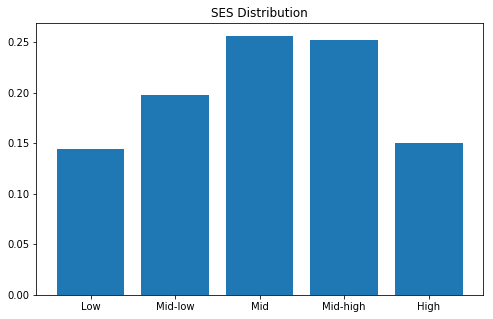

In [119]:
fig,ax = plt.subplots(figsize=(8,5))
plt.bar(height = [x[1] for x in sorted(ses)], x = ['Low','Mid-low','Mid','Mid-high','High']);
ax.set_title('SES Distribution');

In [289]:
df_fil = df[df.estred13 < 6]

In [290]:
y = df_fil.pop('estred13')

In [291]:
df_fil.drop(['anio','numero','dpto','nomdpto','secc','segm','locagr','nom_locagr','ccz','barrio','nombarrio',
             'mes','region_3','region_4','pesoano','pesotri','pesomen','c1','d21_4_1','d21_5','d21_14','d21_15',
             'd21_15_1','d21_15_3','d21_15_5','d21_18','d21_19','d181','d231','d232','d184','d184_1','d23',
             'd24','h155','h155_1','h156','h156_1','h252','h252_1','h158_1','h158_2','h159','h160','h160_1',
             'h160_2','h161','h162','h163_1','h163_2','h164','h165','h227','h166','h269','h269_1','h167_1',
             'h167_1_1','h167_1_2','h167_2','h167_2_1','h167_2_2','h167_3','h167_3_1','h167_3_2','h167_4',
             'h167_4_1','h167_4_2','h169','h170_1','h170_2','h271','h271_1','h171','h171_1','h171_2','h172',
             'h172_1','h173','h173_1','i228','i174','i259','i175','ht1','ht2','ht3','ht4','ht5','ht6','ht7',
             'ht8','ht9','ht10','HT11','ht14','ht19','YHOG','lp_06','li_06','pobre06','indig06'],
            axis=1, inplace=True)

In [292]:
df_fil.shape

(16266, 61)

## Binarizing several features

/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


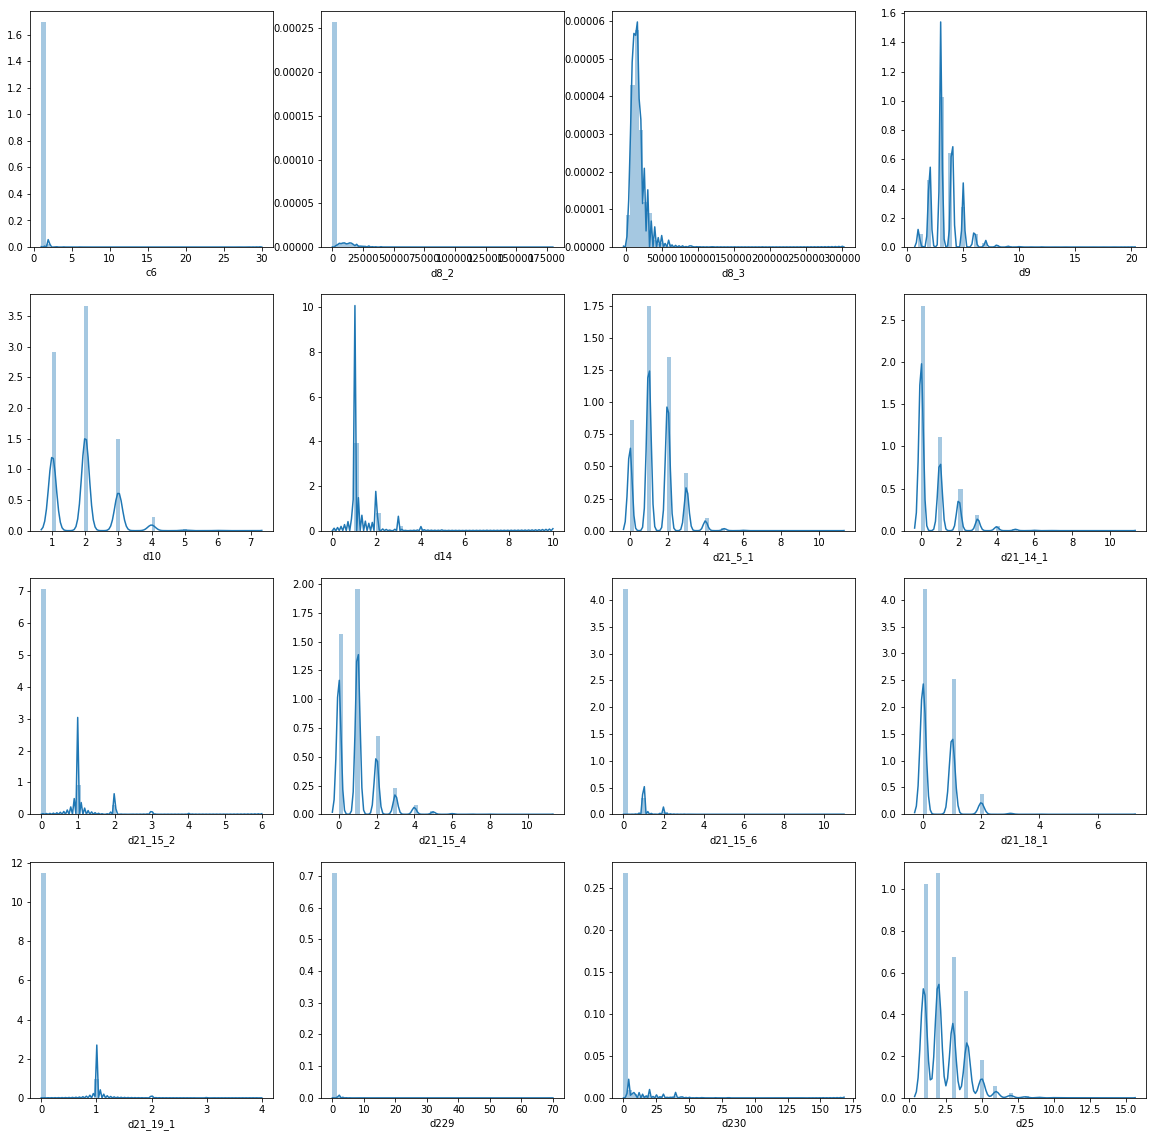

In [233]:
cols = ['c6','d8_2','d8_3','d9','d10','d14','d21_5_1','d21_14_1','d21_15_2','d21_15_4',
        'd21_15_6','d21_18_1','d21_19_1','d229','d230','d25']

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,20))

counter = 0
for row in range(4):
    for col in range(4):
        df_col = cols[counter]
        sns.distplot(df_fil[df_col], ax=ax[row,col])
        counter += 1

In [228]:
c6_clean = ['1' if x == 1 else '2' if x == 2 else '+3' for x in df_fil.c6]

d8_2_clean = ['0' if x==0 else '< 15000' if x < 15000 else '< 30000' if x < 30000 else '>30000' for x in df_fil.d8_2]

d8_3_clean = ['p15' if x < np.percentile(df_fil.d8_3,15) else 'p30' if x < np.percentile(df_fil.d8_3,30) else
             'p45' if x < np.percentile(df_fil.d8_3,45) else 'p60' if x < np.percentile(df_fil.d8_3,60) else
             'p90' if x < np.percentile(df_fil.d8_3,90) else '+p90' for x in df_fil.d8_3]

In [237]:
d9_clean = ['+7' if x >6 else x for x in df_fil.d9]

d10_clean = ['+5' if x >4 else x for x in df_fil.d10]

d14_clean = ['+4' if x >3 else x for x in df_fil.d14]

d21_5_1_clean = ['+5' if x>4 else x for x in df_fil.d21_5_1]

d21_14_1_clean = ['+5' if x>4 else x for x in df_fil.d21_14_1]

d21_15_2_clean = ['+3' if x>2 else x for x in df_fil.d21_15_2]

d21_15_4_clean = ['+5' if x>4 else x for x in df_fil.d21_15_4]

d21_15_6_clean = ['+3' if x>2 else x for x in df_fil.d21_15_6]

d21_18_1_clean = ['+3' if x>2 else x for x in df_fil.d21_18_1]

d21_19_1_clean = ['+2' if x>1 else x for x in df_fil.d21_19_1]

d229_clean = ['0' if x==0 else '< 5' if x < 5 else '> 10' for x in df_fil.d229]

d230_clean = ['0' if x == 0 else '< 25' if x <25 else '< 50' if x < 50 else '> 50' for x in df_fil.d230]

d25_clean = ['+7' if x > 6 else x for x in df_fil.d25]

In [293]:
df_fil['c6_clean'] = c6_clean
df_fil['d8_2_cleann'] = d8_2_clean
df_fil['d8_3_clean'] = d8_3_clean
df_fil['d9_clean'] = d9_clean
df_fil['d10_clean'] = d10_clean
df_fil['d14_clean'] = d14_clean
df_fil['d21_5_1_clean'] = d21_5_1_clean
df_fil['d21_14_1_clean'] = d21_14_1_clean
df_fil['d21_15_2_clean'] = d21_15_2_clean
df_fil['d21_15_4_clean'] = d21_15_4_clean
df_fil['d21_15_6_clean'] = d21_15_6_clean
df_fil['d21_18_1_clean'] = d21_18_1_clean
df_fil['d21_19_1_clean'] = d21_19_1_clean
df_fil['d229_clean'] = d229_clean
df_fil['d230_clean'] = d230_clean
df_fil['d25_clean'] = d25_clean

In [294]:
for col in cols:
    df_fil.drop(col,axis=1,inplace=True)

## Cleaning one extra feature

In [295]:
# Keeping locative value only for property owners

ht13_clean = [x if y < 5 else 0 for x,y in zip(df_fil.HT13, df_fil.d8_1)]

In [296]:
df_fil.drop('HT13', axis=1, inplace=True)
df_fil['ht13_clean'] = ht13_clean

## Dummyfing everything

In [297]:
for each in df_fil.columns:
    if each != 'ht13_clean' and each != 'YSVL':
        df_fil[each] = df_fil[each].astype(object)

In [300]:
df_fil_dum = pd.get_dummies(df_fil, drop_first=True)

In [304]:
df_fil_dum.head()

YSVL  ht13_clean  c2_2.0  c2_3.0  c2_4.0  c2_5.0  c2_6.0  c3_2.0  \
0   36254.92         0.0       1       0       0       0       0       0   
4   13644.27     12000.0       0       0       0       0       0       0   
12  50286.50         0.0       1       0       0       0       0       1   
13  61442.00      9000.0       0       0       0       0       0       0   
24  24071.00         0.0       0       0       0       0       0       0   

    c3_3.0  c3_4.0      ...       d229_clean_> 10  d230_clean_< 25  \
0        1       0      ...                     0                0   
4        0       0      ...                     0                0   
12       0       0      ...                     0                0   
13       0       0      ...                     0                0   
24       0       0      ...                     0                0   

    d230_clean_< 50  d230_clean_> 50  d25_clean_2.0  d25_clean_3.0  \
0                 0                0              0              0   
4                 0                0              1              0   
12                0                0              0              0   
13                0                0              0              0   
24                0                0              0              0   

    d25_clean_4.0  d25_clean_5.0  d25_clean_6.0  d25_clean_+7  
0               0              0              1             0  
4               0              0              0             0  
12              0              0              1             0  
13              1              0              0             0  
24              0              0              0             0  

[5 rows x 147 columns]

## Basic pre modelling

In [325]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import scikitplot as skplt

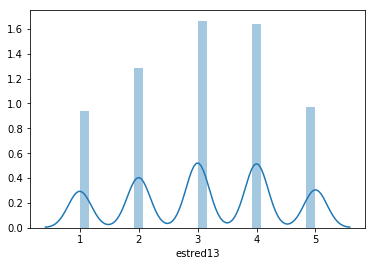

In [362]:
sns.distplot(y);

In [306]:
X_train, X_test, y_train, y_test = train_test_split(
df_fil_dum, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

In [307]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [460]:
logistic_regression = LogisticRegression(max_iter = 500)

In [461]:
params = {'penalty': ['l2'],
         'solver': ['lbfgs'],
         'C': [75,100,125,150],
         'multi_class': ['multinomial']}

In [462]:
logistic_grid = GridSearchCV(logistic_regression, params, cv=5, n_jobs=3)

In [463]:
logistic_grid.fit(X_train, y_train)

/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'penalty': ['l2'], 'solver': ['lbfgs'], 'C': [75, 100, 125, 150], 'multi_class': ['multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [464]:
logistic_grid.best_params_

{'C': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [465]:
log_test_pred = logistic_grid.predict(X_test)

In [466]:
print(metrics.classification_report(y_test,log_test_pred))

              precision    recall  f1-score   support

         1.0       0.65      0.50      0.57       469
         2.0       0.41      0.39      0.40       643
         3.0       0.43      0.48      0.45       834
         4.0       0.49      0.56      0.52       820
         5.0       0.67      0.54      0.60       488

   micro avg       0.50      0.50      0.50      3254
   macro avg       0.53      0.50      0.51      3254
weighted avg       0.51      0.50      0.50      3254



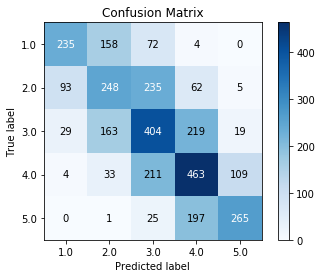

In [467]:
skplt.metrics.plot_confusion_matrix(y_test, log_test_pred)
plt.show()

In [468]:
log_train_pred = logistic_grid.predict(X_train)

In [469]:
print(metrics.classification_report(y_train,log_train_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.51      0.58      1876
         2.0       0.46      0.42      0.44      2572
         3.0       0.44      0.50      0.47      3332
         4.0       0.52      0.60      0.55      3281
         5.0       0.70      0.59      0.64      1951

   micro avg       0.52      0.52      0.52     13012
   macro avg       0.56      0.52      0.54     13012
weighted avg       0.54      0.52      0.53     13012



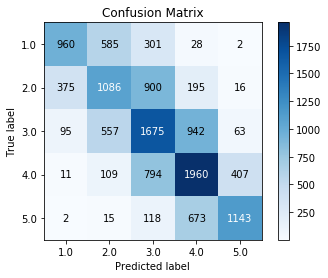

In [470]:
skplt.metrics.plot_confusion_matrix(y_train, log_train_pred)
plt.show()

In [734]:
coefs = pd.DataFrame(np.abs(logistic_grid.best_estimator_.coef_[0]),
                       columns=['Coef'], index=df_fil_dum.columns)

In [735]:
coefs.sort_values(by='Coef',ascending=False).head(10)

Coef
d20_2.0         1.397391
d8_3_clean_p30  1.163429
d21_16_1_1.0    1.160200
d8_3_clean_p15  1.092258
d21_16_2_2.0    0.956152
d8_3_clean_p45  0.877890
d260_2.0        0.738724
d8_3_clean_p60  0.692834
c6_clean_1      0.617183
d21_16_2_1.0    0.554664

## Trying only with more correlated features

In [363]:
scaler.fit(df_fil_dum)
df_scal = scaler.transform(df_fil_dum)

/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


In [534]:
def selecting_correlated(df, y, threshold):
    selected = []
    for each in df.columns:
        cor = np.corrcoef(x=df[each], y=y)
        if cor[0][1] > threshold:
            selected.append(each)
    if len(selected) == 0:
        print('No featured found')
    else:
        returned = df[selected]
        return returned
        #return selected

In [535]:
true_df_scal = pd.DataFrame(df_scal, columns=df_fil_dum.columns)

In [567]:
df_cor = selecting_correlated(true_df_scal, y, 0.15)

In [568]:
X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(
df_cor, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

In [569]:
cor_logistic_regression = LogisticRegression(max_iter = 500)

In [570]:
cor_params = {'penalty': ['l2'],
         'solver': ['lbfgs'],
         'C': [130,150,170],
         'multi_class': ['multinomial']}

In [571]:
cor_logistic_grid = GridSearchCV(cor_logistic_regression, 
                                 cor_params, cv=5, n_jobs=3)

In [572]:
cor_logistic_grid.fit(X_train_cor, y_train_cor)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'penalty': ['l2'], 'solver': ['lbfgs'], 'C': [130, 150, 170], 'multi_class': ['multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [573]:
cor_logistic_grid.best_params_

{'C': 130, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [574]:
cor_test_pred = cor_logistic_grid.predict(X_test_cor)

In [575]:
print(metrics.classification_report(y_test_cor, cor_test_pred))

              precision    recall  f1-score   support

         1.0       0.72      0.43      0.54       469
         2.0       0.39      0.33      0.36       643
         3.0       0.38      0.53      0.44       834
         4.0       0.45      0.49      0.47       820
         5.0       0.62      0.46      0.53       488

   micro avg       0.46      0.46      0.46      3254
   macro avg       0.51      0.45      0.47      3254
weighted avg       0.48      0.46      0.46      3254



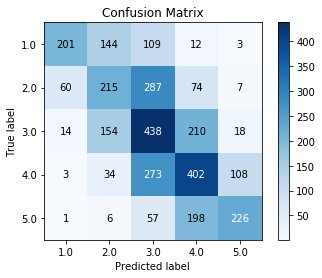

In [576]:
skplt.metrics.plot_confusion_matrix(y_test_cor, cor_test_pred)
plt.show()

## Trying PCA

In [413]:
print('Current number of columns:')
print(df_scal.shape[1])

Current number of columns:
147


In [366]:
from sklearn.decomposition import PCA

In [382]:
pca = PCA(n_components=100)
df_pc = pca.fit_transform(df_scal)

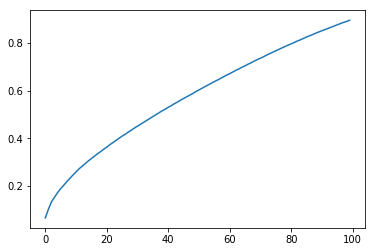

In [411]:
sns.lineplot(y=np.round(np.cumsum(pca.explained_variance_ratio_),3),
             x=range(len(pca.explained_variance_ratio_)))

In [407]:
inc_var = [pca.explained_variance_ratio_[x] - 
           pca.explained_variance_ratio_[x-1] 
           for x in range(1,len(pca.explained_variance_ratio_))]

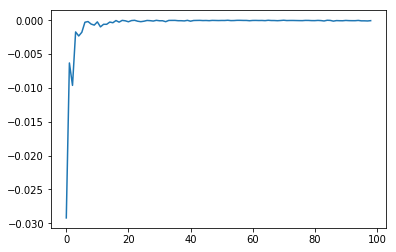

In [410]:
sns.lineplot(y=inc_var, x=range(len(inc_var)))

In [417]:
print('Explained variance at 20 features:')
print(np.cumsum(pca.explained_variance_ratio_)[20])

print('Explained variance at 30 features:')
print(np.cumsum(pca.explained_variance_ratio_)[30])

print('Explained variance at 40 features:')
print(np.cumsum(pca.explained_variance_ratio_)[40])

Explained variance at 20 features:
0.36333284085703205
Explained variance at 30 features:
0.4509452890319495
Explained variance at 40 features:
0.5299185029239181


In [479]:
pca_40 = PCA(n_components=40)
df_pc_40 = pca_40.fit_transform(df_scal)

In [480]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
df_pc_40, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

In [481]:
pca_logistic_regression = LogisticRegression(max_iter = 500)

In [482]:
pca_params = {'penalty': ['l2'],
         'solver': ['lbfgs','newton-cg'],
         'C': [10,50,75,100],
         'multi_class': ['multinomial']}

In [483]:
pca_logistic_grid = GridSearchCV(pca_logistic_regression, 
                             pca_params, cv=5, n_jobs=3)

In [484]:
pca_logistic_grid.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg'], 'C': [10, 50, 75, 100], 'multi_class': ['multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [485]:
pca_logistic_grid.best_params_

{'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [486]:
pca_log_pred = pca_logistic_grid.predict(X_test_pca)

In [487]:
print(metrics.classification_report(y_test_pca,pca_log_pred))

              precision    recall  f1-score   support

         1.0       0.69      0.46      0.56       469
         2.0       0.40      0.37      0.38       643
         3.0       0.41      0.49      0.45       834
         4.0       0.48      0.56      0.51       820
         5.0       0.65      0.49      0.56       488

   micro avg       0.48      0.48      0.48      3254
   macro avg       0.52      0.48      0.49      3254
weighted avg       0.50      0.48      0.48      3254



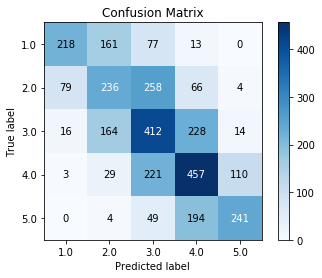

In [489]:
skplt.metrics.plot_confusion_matrix(y_test_pca, pca_log_pred)
plt.show()

## Analyzing and modeling according to income

/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


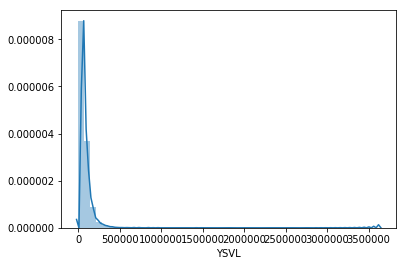

In [581]:
sns.distplot(df_fil_dum.YSVL)

In [586]:
income = pd.concat(objs=[df_fil_dum.YSVL,y], axis=1)

In [590]:
income.groupby('estred13').mean().YSVL

estred13
1.0     44169.778756
2.0     52161.430676
3.0     64112.850788
4.0     86483.955844
5.0    133429.595838
Name: YSVL, dtype: float64

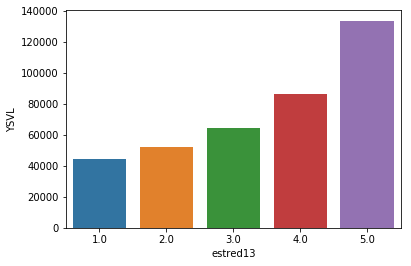

In [592]:
sns.barplot(x=income.groupby('estred13').mean().index,
           y=income.groupby('estred13').mean().YSVL);

In [597]:
np.percentile(df_fil_dum.YSVL,90)

143103.5

In [651]:
def setup_clusters(inlist, percentiles):
    returner = []
    for each in inlist:
        append = False
        
        if each > np.percentile(inlist,percentiles[-1]):
            returner.append(len(percentiles))
        
        else:
            for per in range(len(percentiles)):
                if each <= np.percentile(inlist,percentiles[per]) and append == False:
                    returner.append(per)
                    append = True
    
    return returner

In [743]:
new_target = setup_clusters(df_fil_dum.YSVL, [20,40,60,80])

In [744]:
test = df_fil_dum[['YSVL']].copy()
test.reset_index(level=0,inplace=True,drop=True)
test['new_target'] = new_target

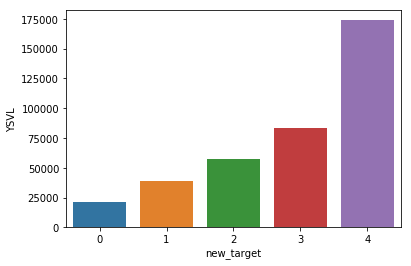

In [745]:
sns.barplot(x=test.groupby('new_target').mean().index,
           y=test.groupby('new_target').mean().YSVL);

In [746]:
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
df_fil_dum, new_target, test_size=0.2, stratify=new_target, random_state=123, shuffle=True)

In [747]:
X_train_nt.drop('YSVL',inplace=True,axis=1)
X_test_nt.drop('YSVL',inplace=True,axis=1)

In [748]:
scaler.fit(X_train_nt)
X_train_nt = scaler.transform(X_train_nt)
X_test_nt = scaler.transform(X_test_nt)

/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
/Users/gonzaloferreiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [749]:
logistic_regression_nt = LogisticRegression(max_iter = 500)

In [750]:
params_nt = {'penalty': ['l2'],
         'solver': ['lbfgs'],
         'C': [10,50,100,125],
         'multi_class': ['multinomial']}

In [751]:
logistic_grid_nt = GridSearchCV(logistic_regression_nt, params_nt, cv=5, n_jobs=3)

In [752]:
logistic_grid_nt.fit(X_train_nt, y_train_nt)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'penalty': ['l2'], 'solver': ['lbfgs'], 'C': [10, 50, 100, 125], 'multi_class': ['multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [753]:
logistic_grid_nt.best_params_

{'C': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [754]:
log_test_pred_nt = logistic_grid_nt.predict(X_test_nt)

In [755]:
print(metrics.classification_report(y_test_nt,log_test_pred_nt))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       651
           1       0.38      0.37      0.37       651
           2       0.34      0.31      0.33       651
           3       0.40      0.39      0.40       651
           4       0.67      0.72      0.70       650

   micro avg       0.49      0.49      0.49      3254
   macro avg       0.48      0.49      0.49      3254
weighted avg       0.48      0.49      0.49      3254



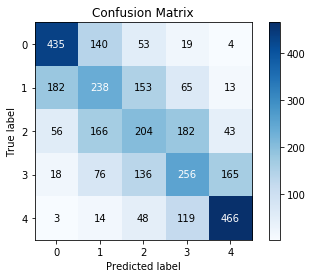

In [756]:
skplt.metrics.plot_confusion_matrix(y_test_nt, log_test_pred_nt)
plt.show()

In [761]:
impact = ['neg' if x < 0 else 'pos' for x in logistic_grid_nt.best_estimator_.coef_[0]]

In [767]:
coefs_nt = pd.DataFrame({'feature': df_fil_dum.iloc[:,1:].columns,
                        'Low class': logistic_grid_nt.best_estimator_.coef_[0],
                        'Low-middle class': logistic_grid_nt.best_estimator_.coef_[1],
                        'Middle class': logistic_grid_nt.best_estimator_.coef_[2],
                        'High-middle class': logistic_grid_nt.best_estimator_.coef_[3],
                        'High class': logistic_grid_nt.best_estimator_.coef_[4]})

In [771]:
coefs_nt.sort_values(by='Low class',ascending=True).head(15)

feature  Low class  Low-middle class  Middle class  \
79           d21_16_2.0  -2.156002          0.396939      1.119694   
80         d21_16_1_1.0  -1.391786          1.276897      0.037431   
83         d21_16_2_2.0  -1.095199         -0.996381      1.216464   
142       d25_clean_4.0  -1.081684         -0.419907      0.116513   
141       d25_clean_3.0  -0.931924         -0.386748      0.057379   
143       d25_clean_5.0  -0.892789         -0.302538      0.061988   
82         d21_16_2_1.0  -0.838475         -0.686228      0.797579   
140       d25_clean_2.0  -0.714442         -0.293400      0.070991   
144       d25_clean_6.0  -0.573487         -0.232463      0.056242   
132   d21_18_1_clean_+3  -0.569967          0.132634      0.099525   
145        d25_clean_+7  -0.556725         -0.224900      0.036765   
113    d21_5_1_clean_+5  -0.525323         -0.532333      0.315991   
81         d21_16_1_2.0  -0.483647          0.592715     -0.004355   
89   d8_2_cleann_>30000  -0.430870         -0.454021      0.231526   
118   d21_14_1_clean_+5  -0.395850         -0.520240      0.259987   

     High-middle class  High class  
79            0.607497    0.031872  
80            0.055082    0.022376  
83            0.731081    0.144036  
142           0.529539    0.855539  
141           0.474419    0.786874  
143           0.402861    0.730478  
82            0.526202    0.200923  
140           0.333919    0.602933  
144           0.303508    0.446200  
132           0.114856    0.222952  
145           0.253679    0.491180  
113           0.335946    0.405719  
81           -0.040875   -0.063838  
89            0.256982    0.396384  
118           0.301276    0.354827

In [796]:
coefs = pd.DataFrame({'feature': df_fil_dum.columns,
                        'Low class': logistic_grid.best_estimator_.coef_[0],
                        'Low-middle class': logistic_grid.best_estimator_.coef_[1],
                        'Middle class': logistic_grid.best_estimator_.coef_[2],
                        'High-middle class': logistic_grid.best_estimator_.coef_[3],
                        'High class': logistic_grid.best_estimator_.coef_[4]})

In [798]:
coefs.sort_values(by='Low class',ascending=False).head(15)

feature  Low class  Low-middle class  Middle class  \
92   d8_3_clean_p30   1.163429          0.756117      0.084124   
81     d21_16_1_1.0   1.160200         -1.488178      0.132598   
91   d8_3_clean_p15   1.092258          0.605377     -0.014117   
93   d8_3_clean_p45   0.877890          0.623817      0.101306   
94   d8_3_clean_p60   0.692834          0.471612      0.085319   
86       c6_clean_1   0.617183          0.644446     -0.472131   
29         d8_1_4.0   0.529226          0.395333      0.195065   
87       c6_clean_2   0.492660          0.607712     -0.448133   
82     d21_16_1_2.0   0.490673         -0.586655      0.055017   
95   d8_3_clean_p90   0.434529          0.296414      0.006877   
98     d9_clean_4.0   0.371967          0.313637      0.267641   
80       d21_16_2.0   0.329655         -0.980271      0.761662   
99     d9_clean_5.0   0.329029          0.268075      0.206448   
143   d25_clean_4.0   0.293358          0.196618      0.044851   
144   d25_clean_5.0   0.289415          0.156372     -0.015506   

     High-middle class  High class  
92           -0.629360   -1.374310  
81           -0.250288    0.445667  
91           -0.725827   -0.957690  
93           -0.408832   -1.194182  
94           -0.309154   -0.940610  
86           -0.328913   -0.460585  
29            0.042025   -1.161651  
87           -0.326115   -0.326124  
82           -0.133108    0.174073  
95           -0.159934   -0.577886  
98           -0.338359   -0.614887  
80            0.427789   -0.538835  
99           -0.282084   -0.521469  
143          -0.177927   -0.356900  
144          -0.171806   -0.258475

## Clustering

### K-Means

In [433]:
from sklearn.cluster import KMeans
from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette

In [435]:
k_cluster = KMeans(n_clusters=5, random_state=123)
k_cluster.fit(df_scal)
labels = k_cluster.labels_

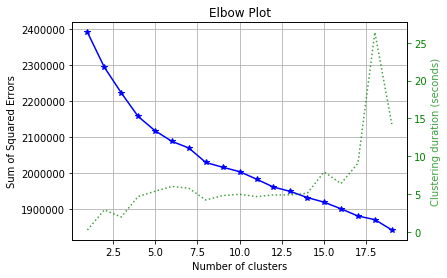

In [436]:
plot_elbow_curve(k_cluster, df_scal, cluster_ranges=range(1,20))
plt.show()

number of clusters:  3


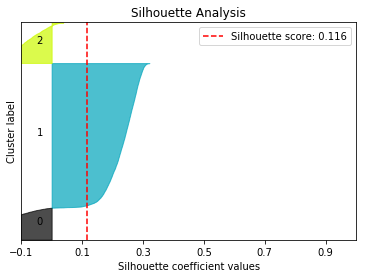

number of clusters:  4


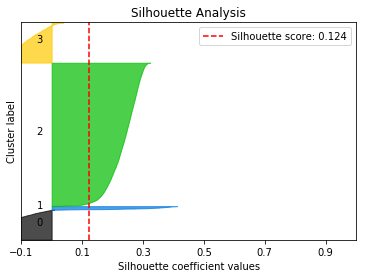

number of clusters:  5


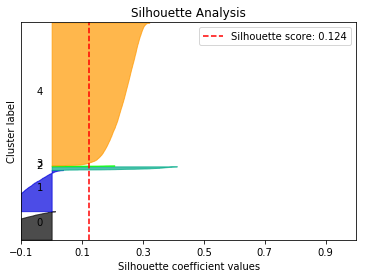

number of clusters:  6


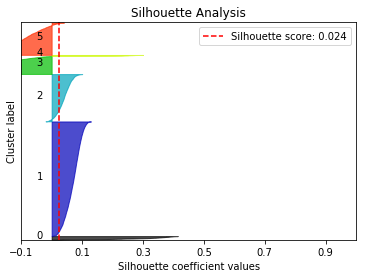

number of clusters:  7


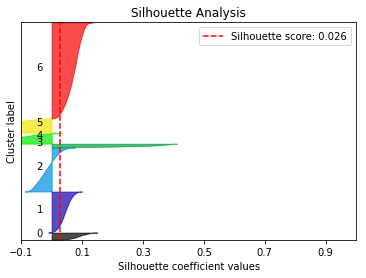

In [434]:
for k in range(3, 8):
    print('number of clusters: ', k)
    model = KMeans(n_clusters=k)
    model.fit(df_scal)
    labels = model.labels_
    plot_silhouette(df_scal, labels)
    plt.show()

In [437]:
from sklearn.metrics import completeness_score
completeness_score(y, labels)

0.15614999099112126

In [438]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, labels)

0.12123155586822917

### Hierarchical Clustering

In [439]:
from sklearn.cluster import AgglomerativeClustering

In [456]:
h_cluster = AgglomerativeClustering(n_clusters=5,
                                   affinity='cosine',
                                   linkage='complete')

h_cluster.fit(df_scal)
labels = h_cluster.labels_

In [457]:
completeness_score(y, labels)

0.0646274463696023

In [458]:
homogeneity_score(y, labels)

0.059687574556502164